In [15]:
import torch
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets
import torchvision
import os 
from torchvision.transforms import ToTensor
from torchvision import datasets, transforms

In [16]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
device

device(type='cuda')

In [17]:
train_dataset_path = 'Data/train'
test_dataset_path = 'Data/test'

In [18]:
train_dataset =  datasets.ImageFolder(root = train_dataset_path , transform = ToTensor())
test_dataset = datasets.ImageFolder(root = test_dataset_path, transform = ToTensor()) 

In [19]:
batch_size = 2048

# Create data loaders.
train_dataloader = DataLoader(train_dataset, batch_size=batch_size)
test_dataloader = DataLoader(test_dataset, batch_size=batch_size)

for X, y in test_dataloader:
    print(f"Shape of X [N, C, H, W]: {X.shape}")
    print(f"Shape of y: {y.shape} {y.dtype}")
    break


Shape of X [N, C, H, W]: torch.Size([2048, 3, 48, 48])
Shape of y: torch.Size([2048]) torch.int64


In [20]:
import torch
model = torch.hub.load('pytorch/vision:v0.10.0', 'googlenet', pretrained=True)
model.dropout = nn.Dropout(0.3)
model.fc = nn.Linear(1024,7)
model.eval()
model.to(device)


Using cache found in C:\Users\User/.cache\torch\hub\pytorch_vision_v0.10.0
c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=GoogLeNet_Weights.IMAGENET1K_V1`. You can also use `weights=GoogLeNet_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


GoogLeNet(
  (conv1): BasicConv2d(
    (conv): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (bn): BatchNorm2d(64, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  )
  (maxpool1): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=True)
  (conv2): BasicConv2d(
    (conv): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
    (bn): BatchNorm2d(64, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  )
  (conv3): BasicConv2d(
    (conv): Conv2d(64, 192, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (bn): BatchNorm2d(192, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  )
  (maxpool2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=True)
  (inception3a): Inception(
    (branch1): BasicConv2d(
      (conv): Conv2d(192, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn): BatchNorm2d(64, eps=0.001, momentum=0.1, affine=True, track

In [21]:
# Define the device (CPU or GPU)
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

# Optimizing the model parameters
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.0001)
model.to(device)


GoogLeNet(
  (conv1): BasicConv2d(
    (conv): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (bn): BatchNorm2d(64, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  )
  (maxpool1): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=True)
  (conv2): BasicConv2d(
    (conv): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
    (bn): BatchNorm2d(64, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  )
  (conv3): BasicConv2d(
    (conv): Conv2d(64, 192, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (bn): BatchNorm2d(192, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  )
  (maxpool2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=True)
  (inception3a): Inception(
    (branch1): BasicConv2d(
      (conv): Conv2d(192, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn): BatchNorm2d(64, eps=0.001, momentum=0.1, affine=True, track

In [22]:
def train(dataloader, model, loss_fn, optimizer):
    size = len(dataloader.dataset)
    model.train()
    for batch, (X, y) in enumerate(dataloader):
        X, y = X.to(device), y.to(device)

        # Compute prediction error
        pred = model(X)
        loss = loss_fn(pred, y)

        # Backpropagation
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if batch % 100 == 0:
            loss, current = loss.item(), batch * len(X)
            print(f"loss: {loss:>7f}  [{current:>5d}/{size:>5d}]")

In [23]:
def test(dataloader, model, loss_fn):
    size = len(dataloader.dataset)
    num_batches = len(dataloader)
    model.eval()
    test_loss, correct = 0, 0
    with torch.no_grad():
        for X, y in dataloader:
            X, y = X.to(device), y.to(device)
            pred = model(X)
            test_loss += loss_fn(pred, y).item()
            correct += (pred.argmax(1) == y).type(torch.float).sum().item()
    test_loss /= num_batches
    correct /= size
    print(f"Test Error: \n Accuracy: {(100*correct):>0.1f}%, Avg loss: {test_loss:>8f} \n")
    return 100*correct

In [24]:
test_accuracies = []
# Training and testing the model
epochs = 15
for t in range(epochs):
    print(f"Epoch {t+1}\n-------------------------------")
    train_loss = train(train_dataloader, model, loss_fn, optimizer)
    acc = test(test_dataloader, model, loss_fn,)
    test_accuracies.append(acc)
print("Done!")
print(test_accuracies)    

Epoch 1
-------------------------------
loss: 1.935758  [    0/28709]
Test Error: 
 Accuracy: 19.5%, Avg loss: 1.964314 

Epoch 2
-------------------------------
loss: 1.878315  [    0/28709]
Test Error: 
 Accuracy: 20.7%, Avg loss: 1.891911 

Epoch 3
-------------------------------
loss: 1.824127  [    0/28709]
Test Error: 
 Accuracy: 25.0%, Avg loss: 1.851496 

Epoch 4
-------------------------------
loss: 1.866328  [    0/28709]
Test Error: 
 Accuracy: 26.3%, Avg loss: 1.812925 

Epoch 5
-------------------------------
loss: 1.845272  [    0/28709]
Test Error: 
 Accuracy: 27.8%, Avg loss: 1.797739 

Epoch 6
-------------------------------
loss: 1.777165  [    0/28709]
Test Error: 
 Accuracy: 28.4%, Avg loss: 1.787188 

Epoch 7
-------------------------------
loss: 1.717086  [    0/28709]
Test Error: 
 Accuracy: 28.9%, Avg loss: 1.780614 

Epoch 8
-------------------------------
loss: 1.574454  [    0/28709]
Test Error: 
 Accuracy: 30.0%, Avg loss: 1.771115 

Epoch 9
----------------

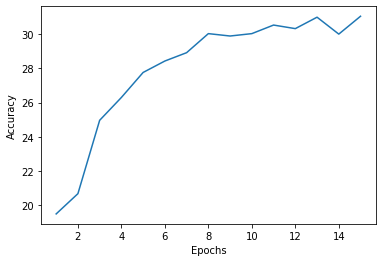

In [25]:
import matplotlib.pyplot as plt

x_axis = [i for i in range(1, epochs+1)]
plt.plot(x_axis, test_accuracies)

plt.xlabel('Epochs')
plt.ylabel('Accuracy')

plt.show()

In [26]:
torch.save(model.state_dict(), "googlenet_model.pth")
print("Saved PyTorch Model State to googlenet_model.pth")

Saved PyTorch Model State to googlenet_model.pth


In [27]:
import torch
model.load_state_dict(torch.load("googlenet_model.pth", map_location=torch.device(device)))
model.to(device)

GoogLeNet(
  (conv1): BasicConv2d(
    (conv): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (bn): BatchNorm2d(64, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  )
  (maxpool1): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=True)
  (conv2): BasicConv2d(
    (conv): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
    (bn): BatchNorm2d(64, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  )
  (conv3): BasicConv2d(
    (conv): Conv2d(64, 192, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (bn): BatchNorm2d(192, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  )
  (maxpool2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=True)
  (inception3a): Inception(
    (branch1): BasicConv2d(
      (conv): Conv2d(192, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn): BatchNorm2d(64, eps=0.001, momentum=0.1, affine=True, track

In [28]:
# test the model
test_dataloader = DataLoader(datasets.ImageFolder(root = 'Data/test', transform = ToTensor()) , batch_size=2000)
test(test_dataloader, model, loss_fn)

Test Error: 
 Accuracy: 31.1%, Avg loss: 1.753839 



31.053218166620226